Step 1: Load Data & Perform EDA

In [ ]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set visualization style and color palette
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Load dataset
file_path = "/content/Twitter Dataset.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

In [ ]:
# Print basic details about the dataset
print("Dataset loaded successfully.")
print(f"Shape of the dataset: {df.shape}")
print("\nColumns in dataset:", df.columns.tolist())

Dataset loaded successfully.
Shape of the dataset: (24783, 7)

Columns in dataset: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']


In [ ]:
# Display the first few rows of the dataset
df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [ ]:
# 1. Check for Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [ ]:
# 2. Class Distribution (Target Variable)
df['label_name'] = df['class'].map({0: "Hate Speech", 1: "Offensive", 2: "Neutral"})

/tmp/ipython-input-1420798222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label_name", data=df, palette="viridis")


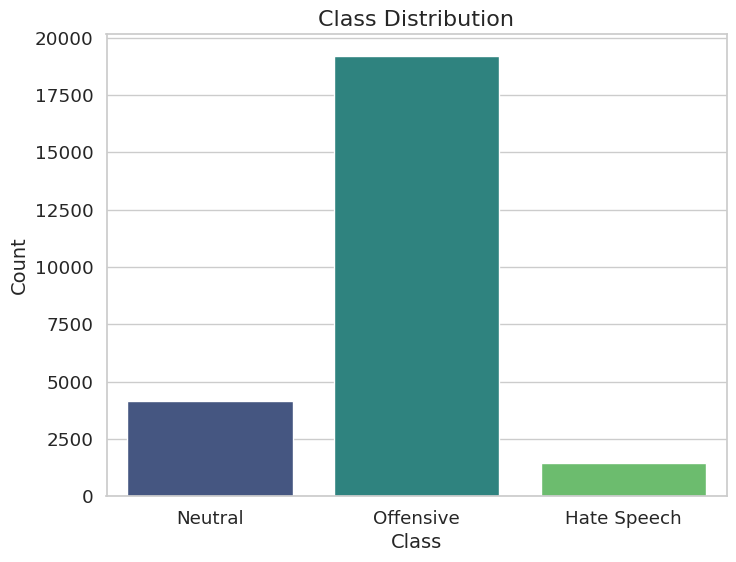

In [ ]:
# Plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="label_name", data=df, palette="viridis")
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 3. Tweet Length Analysis
df['tweet_length'] = df['tweet'].apply(lambda x: len(str(x)))

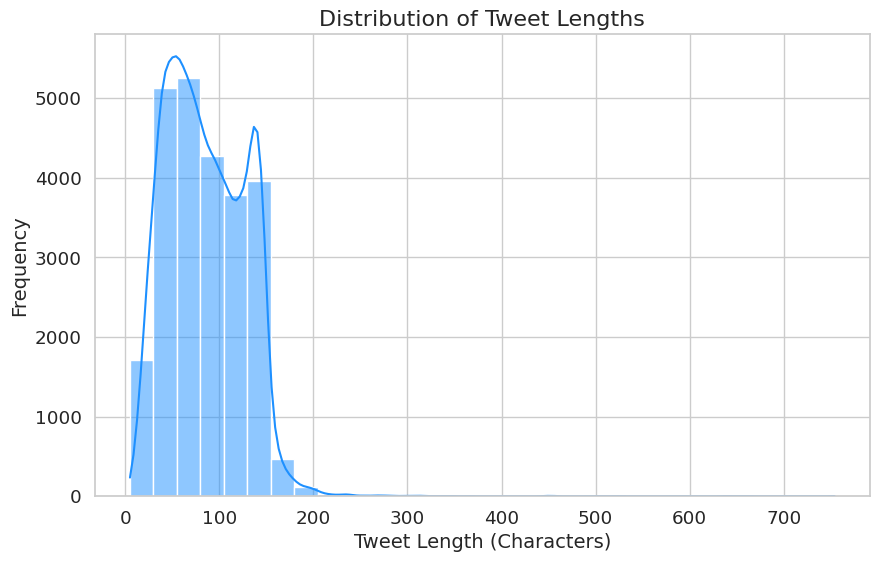

In [ ]:
# Plotting tweet length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True, color="dodgerblue")
plt.title("Distribution of Tweet Lengths", fontsize=16)
plt.xlabel("Tweet Length (Characters)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [ ]:
# 4. Statistical Summary of Tweet Lengths
print("\nStatistical Summary of Tweet Lengths:")
print(df['tweet_length'].describe())



Statistical Summary of Tweet Lengths:
count    24783.000000
mean        85.436065
std         41.548238
min          5.000000
25%         52.000000
50%         81.000000
75%        119.000000
max        754.000000
Name: tweet_length, dtype: float64


In [ ]:
# 5. Word Count Distribution (Optional for additional insight)
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))

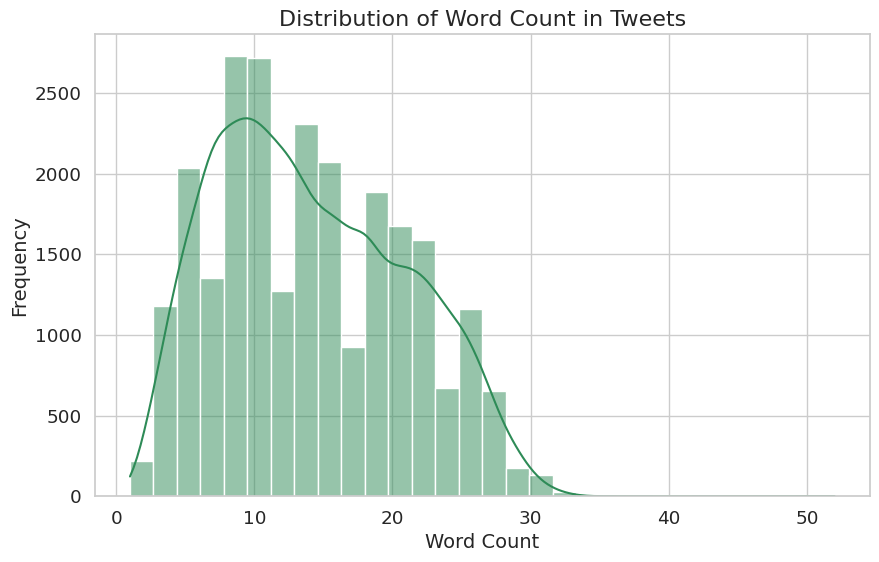

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color="seagreen")
plt.title("Distribution of Word Count in Tweets", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np

# Set up colors for better visualizations
color_palette = ["#4E79A7", "#F28E2B", "#E15759"]

# Word Cloud for each class (Hate Speech, Offensive, Neutral)
def plot_word_cloud(data, title, ax):
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap='viridis').generate(str(data))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)

# Create subplots for Word Cloud of each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_word_cloud(df[df['label_name'] == 'Hate Speech']['tweet'], 'Hate Speech', axes[0])
plot_word_cloud(df[df['label_name'] == 'Offensive']['tweet'], 'Offensive', axes[1])
plot_word_cloud(df[df['label_name'] == 'Neutral']['tweet'], 'Neutral', axes[2])

plt.tight_layout()
plt.show()

# Top N Frequent Words (Across all classes)
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to find the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(df['tweet'])
word_freq = np.array(X.toarray()).sum(axis=0)

# Create a DataFrame with words and their frequencies
word_freq_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'Frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)




/tmp/ipython-input-2901954294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='crest')


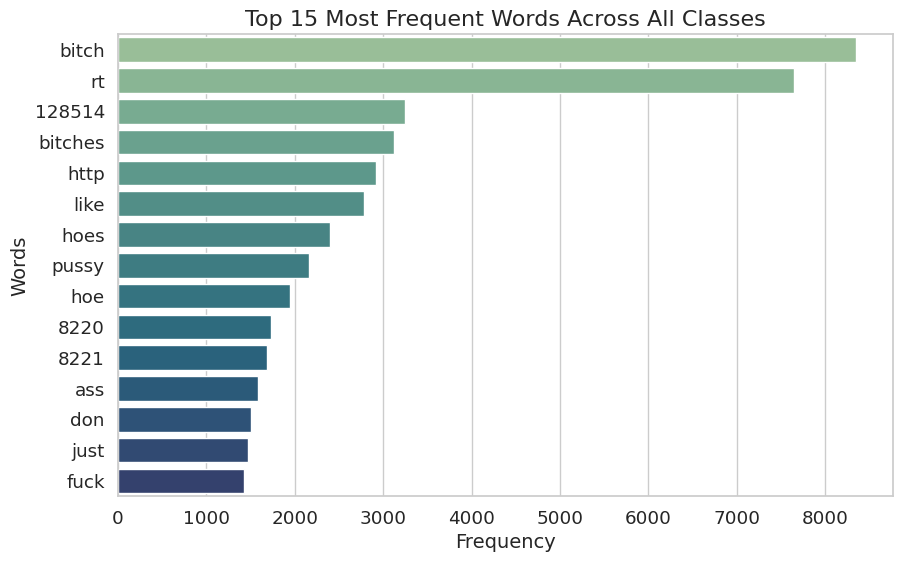

In [ ]:

# Plot Top N Frequent Words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='crest')
plt.title("Top 15 Most Frequent Words Across All Classes", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.show()

Step 2: Preprocessing for Machine Learning Model (SVM, TF-IDF + Data Augmentation)

In [11]:
import re
import nltk
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import random

In [27]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Load your dataset
file_path = "/content/Twitter Dataset.csv"  # Replace with actual path
df = pd.read_csv(file_path)

In [29]:
# Check the structure of the dataset
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (24783, 7)
Columns: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']


In [30]:
# Function to clean the text
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)  # Remove mentions (@username)
    text = re.sub(r"#\w+", '', text)  # Remove hashtags (#hashtag)
    text = re.sub(r"\d+", '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text


In [31]:
# Apply cleaning function to the 'tweet' column
df['clean_text'] = df['tweet'].apply(clean_text)

In [32]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['clean_text'].apply(tokenize_text)

In [33]:
# Data Augmentation: Synonym Replacement using NLTK's WordNet
def synonym_replacement(sentence, n_replacements=1):
    words = word_tokenize(sentence)
    random.shuffle(words)  # Shuffle the words to get varied replacements
    for i, word in enumerate(words):
        synonyms = wordnet.synsets(word)
        if synonyms:
            replacement = random.choice(synonyms[0].lemma_names())  # Get a random synonym
            words[i] = replacement
        if i > n_replacements:  # Limit the number of replacements
            break
    return " ".join(words)


In [34]:
# Augment the training data (Apply synonym replacement)
def augment_data(X, y, n_aug=1):
    augmented_data = []
    augmented_labels = []
    for tweet, label in zip(X, y):
        augmented_data.append(tweet)  # Add the original tweet
        augmented_labels.append(label)  # Add the original label
        for _ in range(n_aug):
            augmented_data.append(synonym_replacement(tweet))  # Add augmented tweet
            augmented_labels.append(label)  # Add the same label for augmented tweet
    return augmented_data, augmented_labels

# Augment the 'clean_text' column for training (you can adjust n_aug for more augmentation)
X_train_aug, y_train_aug = augment_data(df['clean_text'], df['class'], n_aug=2)

In [35]:
# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # Use unigrams and bigrams
X_train_tfidf = vectorizer.fit_transform(X_train_aug)
X_test_tfidf = vectorizer.transform(df['clean_text'])  # TF-IDF transformation for test set

In [36]:
# 3. Train-Test Split
y = df['class']  # 'class' is your target variable (0: Hate Speech, 1: Offensive, 2: Neutral)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_train_aug, test_size=0.2, random_state=42)


In [ ]:
# 4. Model Training: SVM Classifier
svm_model = SVC(kernel="linear", probability=True)  # Using a linear kernel for text classification
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Hate Speech", "Offensive", "Neutral"]))

Classification Report:
              precision    recall  f1-score   support

 Hate Speech       0.74      0.29      0.42       870
   Offensive       0.94      0.97      0.95     11507
     Neutral       0.87      0.92      0.90      2493

    accuracy                           0.92     14870
   macro avg       0.85      0.73      0.76     14870
weighted avg       0.92      0.92      0.91     14870



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9219


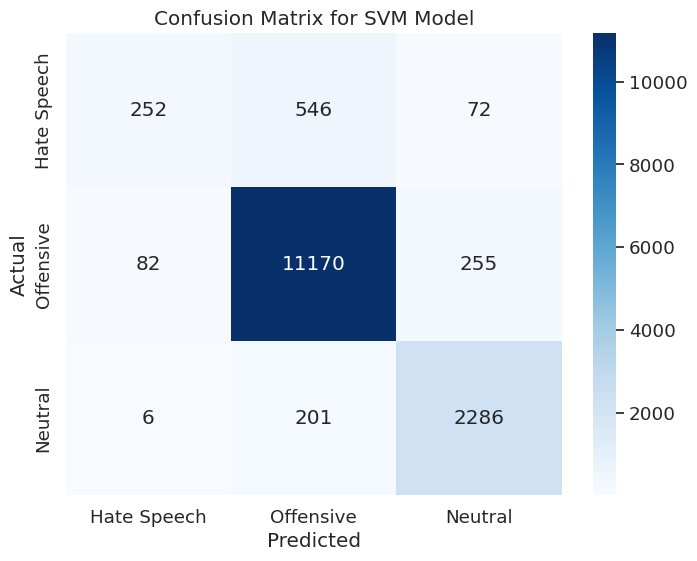

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Hate Speech", "Offensive", "Neutral"], yticklabels=["Hate Speech", "Offensive", "Neutral"])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import joblib

# Save the trained SVM model
model_filename = "svm_model.joblib"
joblib.dump(svm_model, model_filename)

# Save the vectorizer for later use (needed when transforming new data)
vectorizer_filename = "vectorizer.joblib"
joblib.dump(vectorizer, vectorizer_filename)

print(f"Model and vectorizer saved as {model_filename} and {vectorizer_filename}")


Model and vectorizer saved as svm_model.joblib and vectorizer.joblib


In [ ]:
# Load the saved model and vectorizer
svm_model_loaded = joblib.load("svm_model.joblib")
vectorizer_loaded = joblib.load("vectorizer.joblib")

# Use the loaded model to make predictions
new_tweet = ["This is a sample tweet"]  # Replace with actual new tweet
new_tweet_cleaned = [clean_text(tweet) for tweet in new_tweet]  # Clean the new tweet
new_tweet_tfidf = vectorizer_loaded.transform(new_tweet_cleaned)  # Transform the new tweet using the loaded vectorizer

# Predict with the loaded model
prediction = svm_model_loaded.predict(new_tweet_tfidf)
print(f"Predicted Class: {prediction}")


Predicted Class: [1]


Step 3: LSTM Model (with Augmentation for Maximum Validation Accuracy)

In [37]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import random
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Clean and preprocess text data (same as previous steps)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)  # Remove mentions
    text = re.sub(r"#\w+", '', text)  # Remove hashtags
    text = re.sub(r"\d+", '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['clean_text'] = df['tweet'].apply(clean_text)

# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['clean_text'].apply(tokenize_text)

# Synonym Replacement for Data Augmentation
def synonym_replacement(sentence, n_replacements=1):
    words = word_tokenize(sentence)
    random.shuffle(words)
    for i, word in enumerate(words):
        synonyms = wordnet.synsets(word)
        if synonyms:
            replacement = random.choice(synonyms[0].lemma_names())
            words[i] = replacement
        if i > n_replacements:
            break
    return " ".join(words)

# Apply synonym replacement to augment the data
def augment_data(X, y, n_aug=1):
    augmented_data = []
    augmented_labels = []
    for tweet, label in zip(X, y):
        augmented_data.append(tweet)
        augmented_labels.append(label)
        for _ in range(n_aug):
            augmented_data.append(synonym_replacement(tweet))
            augmented_labels.append(label)
    return augmented_data, augmented_labels

X_train_aug, y_train_aug = augment_data(df['clean_text'], df['class'], n_aug=2)


In [39]:
MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 50

# Tokenizer and Fit on Augmented Text Data
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, lower=True)
tokenizer.fit_on_texts(X_train_aug)

# Convert text to sequences
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_aug), maxlen=MAX_SEQ_LEN)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(df['clean_text']), maxlen=MAX_SEQ_LEN)

# Check tokenized and padded data
print(f"Shape of X_train_seq: {X_train_seq.shape}, Shape of X_test_seq: {X_test_seq.shape}")


Shape of X_train_seq: (74349, 50), Shape of X_test_seq: (24783, 50)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=300, input_length=MAX_SEQ_LEN))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))

# Another Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

# Dense layer with ReLU activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer (softmax for multi-class classification)
model.add(Dense(len(df['class'].unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_seq, y_train_aug, test_size=0.2, random_state=42)

In [56]:
# Ensure that the data is in the right format
import numpy as np

# Ensure X_train, X_val, X_test are numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Ensure y_train, y_val, y_test are numpy arrays (as class indices)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Check data shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# Now, proceed with training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    verbose=1
)


X_train shape: (59479, 50)
X_val shape: (14870, 50)
y_train shape: (59479,)
y_val shape: (14870,)
Epoch 1/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8495 - loss: 0.4454 - val_accuracy: 0.9281 - val_loss: 0.2004
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9470 - loss: 0.1546 - val_accuracy: 0.9516 - val_loss: 0.1442
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9682 - loss: 0.0924 - val_accuracy: 0.9568 - val_loss: 0.1275
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9778 - loss: 0.0639 - val_accuracy: 0.9610 - val_loss: 0.1190
Epoch 5/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9816 - loss: 0.0511 - val_accuracy: 0.9587 - val_loss: 0.1408
Epoch 6/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9846 - loss: 0.0416 - val_accuracy: 0.9609 - val_loss: 0.1398
Epoch 7/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9868 - loss: 0.0343 - val_accuracy: 0.9610 - val_loss:

In [57]:
# Predictions
y_pred = model.predict(X_test_seq)
y_pred_class = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

775/775 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [58]:
# Print Classification Report
print("Classification Report:")
print(classification_report(df['class'], y_pred_class, target_names=["Hate Speech", "Offensive", "Neutral"]))


Classification Report:
              precision    recall  f1-score   support

 Hate Speech       0.95      0.87      0.91      1430
   Offensive       0.99      0.99      0.99     19190
     Neutral       0.98      0.99      0.99      4163

    accuracy                           0.99     24783
   macro avg       0.97      0.95      0.96     24783
weighted avg       0.99      0.99      0.99     24783



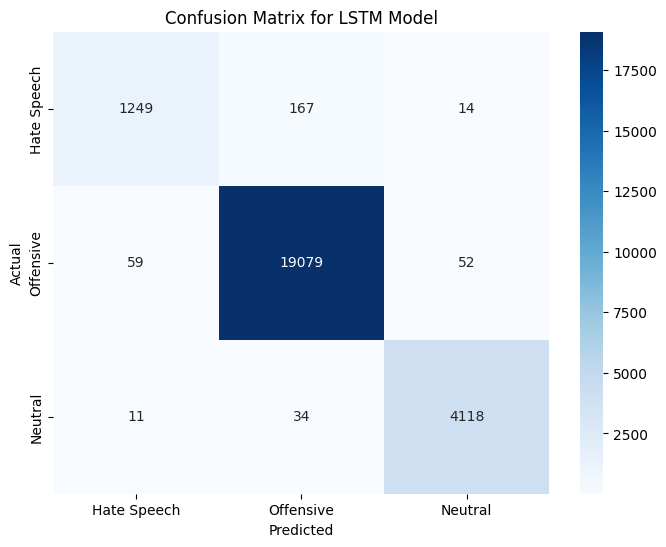

In [59]:
# Confusion Matrix
cm = confusion_matrix(df['class'], y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Hate Speech", "Offensive", "Neutral"], yticklabels=["Hate Speech", "Offensive", "Neutral"])
plt.title("Confusion Matrix for LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


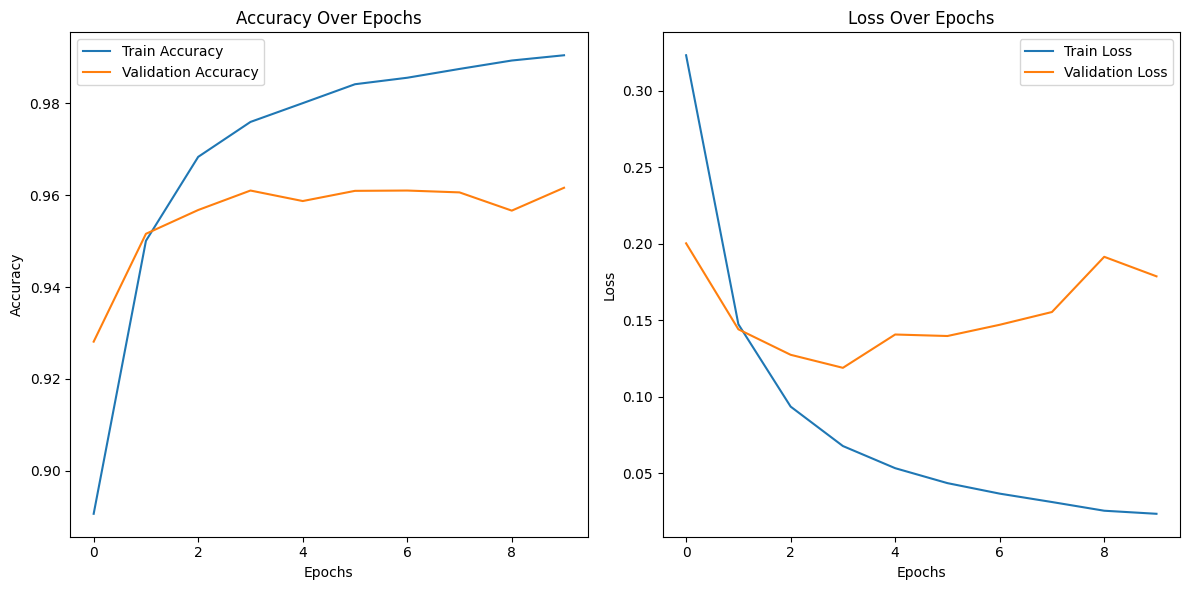

In [60]:
# Plot Accuracy Curves
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

BERT Model Setup and Training

In [61]:
# You may need to install the Hugging Face transformers library
!pip install transformers
!pip install datasets
!pip install torch


In [62]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model runs on GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [63]:
# Load the pre-trained BERT model for sequence classification (using PyTorch)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [64]:
# Tokenizer setup
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [65]:
# Tokenize the augmented training and test data
def tokenize_data(texts, max_len=128):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors="pt"
    )

# Tokenize augmented training data
train_encodings = tokenize_data(X_train_aug)

In [66]:
# Tokenize the test data (ensure it's passed as a list of strings)
test_encodings = tokenize_data(df['clean_text'].tolist())

In [67]:
# Convert labels to numpy arrays
train_labels = np.array(y_train_aug)
test_labels = np.array(df['class'])

In [68]:
# Create a Dataset class for PyTorch
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [69]:
# Create datasets
train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)


In [70]:
# DataLoader for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [71]:
from torch.optim import AdamW

# Define the optimizer (now from PyTorch)
optimizer = AdamW(model.parameters(), lr=5e-5)


In [72]:
from tqdm import tqdm
import torch
import numpy as np

# Define number of epochs
epochs = 5
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    loop = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    epoch_loss = 0
    correct = 0
    total = 0

    for batch in loop:
        batch = {key: value.to(device) for key, value in batch.items()}

        # Forward pass
        optimizer.zero_grad()
        outputs = model(**batch)

        loss = outputs.loss
        logits = outputs.logits

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Track batch loss
        epoch_loss += loss.item()

        # Track accuracy
        predicted_labels = torch.argmax(logits, dim=-1)
        correct += (predicted_labels == batch['labels']).sum().item()
        total += batch['labels'].size(0)

        loop.set_postfix(loss=loss.item())

    # Average loss and accuracy per epoch
    train_losses.append(epoch_loss / len(train_dataloader))
    train_accuracies.append(correct / total)

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch in test_dataloader:
            batch = {key: value.to(device) for key, value in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()
            predicted_labels = torch.argmax(logits, dim=-1)
            val_correct += (predicted_labels == batch['labels']).sum().item()
            val_total += batch['labels'].size(0)

    val_losses.append(val_loss / len(test_dataloader))
    val_accuracies.append(val_correct / val_total)

    # Print epoch-wise results for training and validation
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}")


Epoch 1/5:   0%|          | 0/4647 [00:00<?, ?it/s]/tmp/ipython-input-1656033685.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1/5
Train Loss: 0.2658, Train Accuracy: 0.9052
Validation Loss: 0.1965, Validation Accuracy: 0.9277


Epoch 2/5
Train Loss: 0.1730, Train Accuracy: 0.9402
Validation Loss: 0.1044, Validation Accuracy: 0.9672


Epoch 3/5
Train Loss: 0.1068, Train Accuracy: 0.9652
Validation Loss: 0.0520, Validation Accuracy: 0.9839


Epoch 4/5
Train Loss: 0.0682, Train Accuracy: 0.9779
Validation Loss: 0.0386, Validation Accuracy: 0.9882


Epoch 5/5
Train Loss: 0.0526, Train Accuracy: 0.9836
Validation Loss: 0.0358, Validation Accuracy: 0.9903


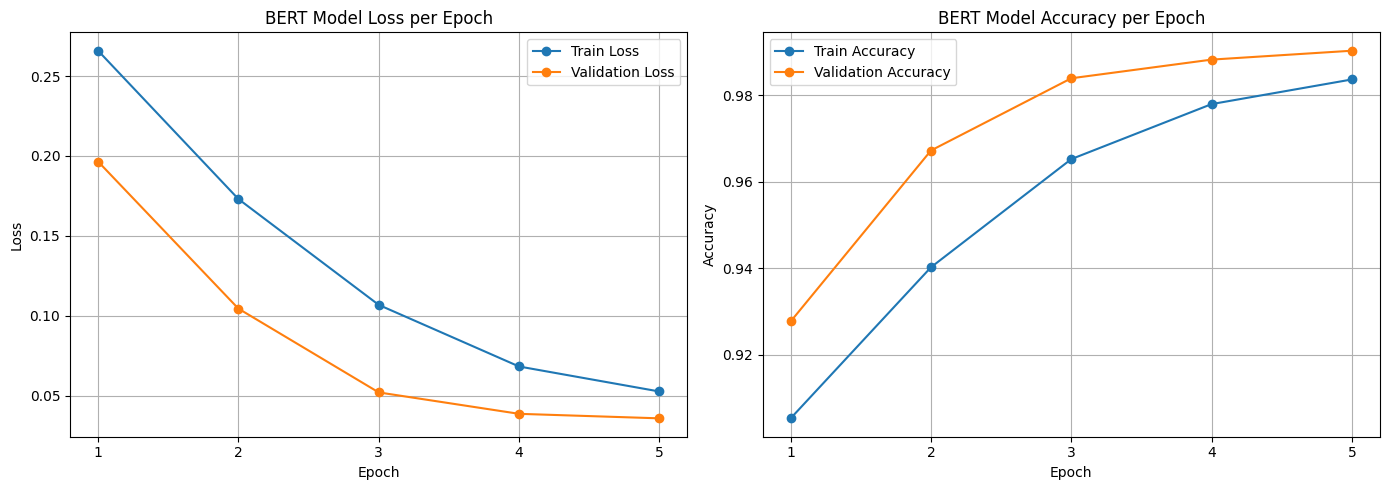

In [73]:
# Plot Loss and Accuracy side by side
plt.figure(figsize=(14,5))

# --- Loss Curve ---
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Validation Loss')
plt.title('BERT Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid(True)

# --- Accuracy Curve ---
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, marker='o', label='Validation Accuracy')
plt.title('BERT Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1656033685.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


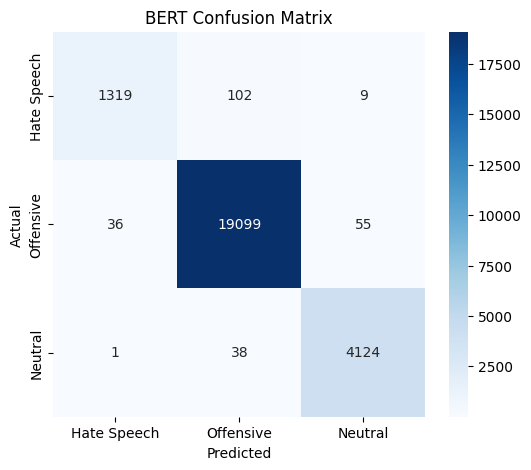

In [74]:
# Evaluate model on test data to get predictions
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=-1)

        all_predictions.extend(predicted_labels.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Confusion matrix
labels_names = ["Hate Speech", "Offensive", "Neutral"]
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_names, yticklabels=labels_names)
plt.title('BERT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
